In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df17 = pd.read_csv('developer_survey_2017/survey_results_public.csv')
df17_schema = pd.read_csv('developer_survey_2017/survey_results_schema.csv')
df17.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df20 = pd.read_csv('developer_survey_2020/survey_results_public.csv')
df20_schema = pd.read_csv('developer_survey_2020/survey_results_schema.csv')
df20.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [3]:
df23 = pd.read_csv('developer-survey-2023/survey_results_public.csv')
df23_schema = pd.read_csv('developer-survey-2023/survey_results_schema.csv')
df23.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [4]:
def dataframe_shape(input_df,year):
    num_rows = input_df.shape[0] #Provide the number of rows in the dataset
    num_cols = input_df.shape[1] #Provide the number of columns in the dataset
    print('There are {} of rows and {} of columns in the {} survey data.'.format(num_rows, num_cols,year))
    

In [5]:
def get_description(column_name, schema=df17_schema):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    desc = list(schema[schema['Column'] == column_name]['Question'])[0]
    return desc

#test your code
#Check your function against solution - you shouldn't need to change any of the below code
get_description(df17.columns[0]) # This should return a string of the first column description

'Respondent ID number'

In [6]:
dataframe_shape(df17,2017)

There are 51392 of rows and 154 of columns in the 2017 survey data.


In [7]:
dataframe_shape(df20,2020)

There are 64461 of rows and 61 of columns in the 2020 survey data.


In [8]:
dataframe_shape(df23,2023)

There are 89184 of rows and 84 of columns in the 2023 survey data.


In [9]:
def rename_values(s1, s2, s3, name_dict):
    """
    This function takes in three pandas Series objects (s1, s2, s3) and a dictionary (name_dict) as input.
    It renames the values in each Series based on the mapping provided in the name_dict.
    
    Parameters:
    s1, s2, s3 (pandas Series): The Series objects to be renamed.
    name_dict (dict): A dictionary containing the mapping of old values to new values.
    
    Returns:
    s1, s2, s3 (pandas Series): The renamed Series objects.
    """
    s1 = s1.rename(name_dict)
    s2 = s2.rename(name_dict)
    s3 = s3.rename(name_dict)
    return s1, s2, s3


In [10]:
def combine_data(df1,df2,df3):
    """
    Combine all dataframes into one orther of the datafames matter
    First dataframe from 2017, then 2020 and then 2023
    """
    combined_df = pd.concat([df1, df2,df3], axis=1, sort=True)
    combined_df.columns = ['df17', 'df20', 'df23']
    
    # Fill missing values with zeros
    combined_df = combined_df.fillna(0)
    #sort the new dataframe
    combined_df.sort_values(by = 'df23',ascending=False,inplace=True)
    # Plot the bar chart
    return combined_df

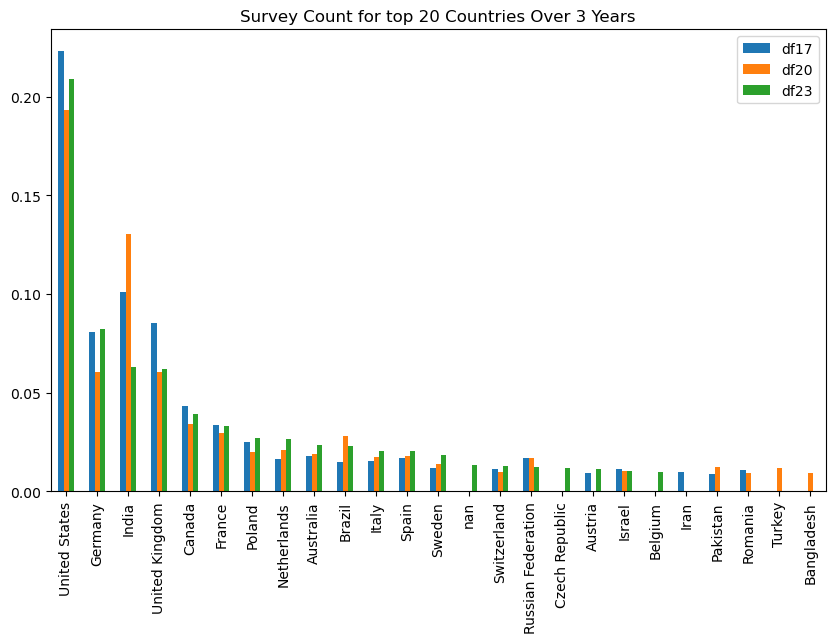

In [11]:
# Convert the 'Country' column to string type
df17['Country'] = df17['Country'].astype(str)
df20['Country'] = df20['Country'].astype(str)
df23['Country'] = df23['Country'].astype(str)

#Synchronize the country names accros all 3 years


#Provide a pandas series of the counts for each Country
count_vals17 = df17['Country'].value_counts()/df17.shape[0]
count_vals20 = df20['Country'].value_counts()/df20.shape[0]
count_vals23 = df23['Country'].value_counts()/df23.shape[0]

# Rename the country names
new_country_names = {'United States of America': 'United States', 'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom', 'Iran, Islamic Republic of...': 'Iran'}
count_vals17,count_vals20,count_vals23 = rename_values(count_vals17,count_vals20,count_vals23,new_country_names)

# Plot the bar chart
combined_counts = combine_data(count_vals17[:20], count_vals20[:20], count_vals23[:20])
combined_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Survey Count for top 20 Countries Over 3 Years');

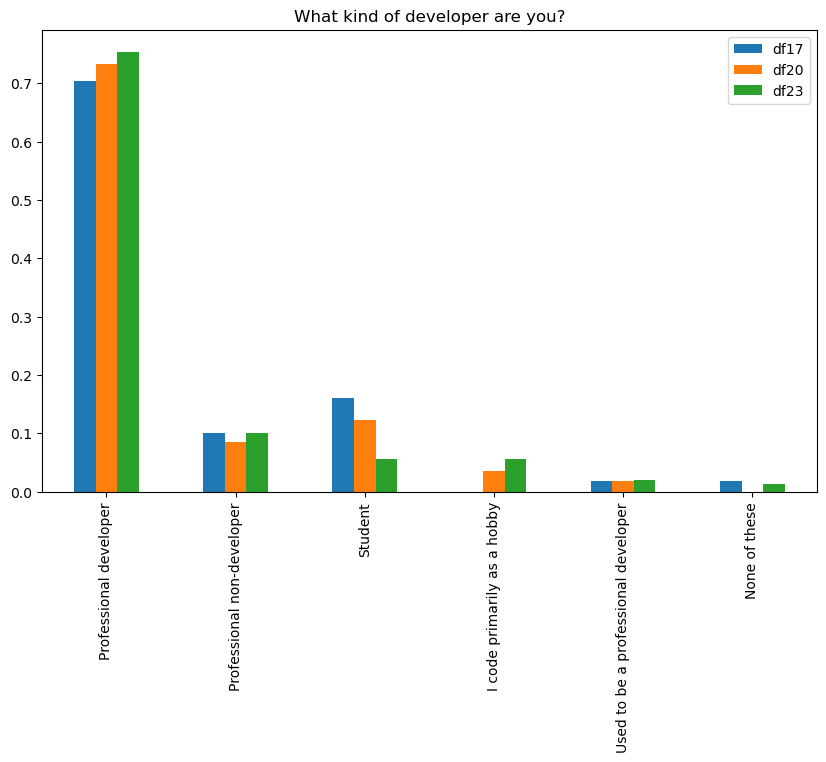

In [12]:
#Provide a pandas series of the counts for each dataframe
status_vals17 = df17['Professional'].value_counts()/df17.shape[0]
status_vals20 = df20['MainBranch'].value_counts()/df20.shape[0]
status_vals23 = df23['MainBranch'].value_counts()/df23.shape[0]

# renaming the status in all 3 data frames
new_status_names = {'I am a developer by profession': 'Professional developer', 
                    'I am not primarily a developer, but I write code sometimes as part of my work/studies': 'Professional non-developer', 
                    'I used to be a developer by profession, but no longer am': 'Used to be a professional developer', 
                    'I am a student who is learning to code': 'Student', 
                    'I am learning to code':'Student',
                    'Professional non-developer who sometimes writes code':'Professional non-developer',
                    'I am not primarily a developer, but I write code sometimes as part of my work':'Professional non-developer'}

status_vals17,status_vals20,status_vals23 = rename_values(status_vals17,status_vals20,status_vals23,new_status_names)

# Combine and Plot the bar chart
combined_status = combine_data(status_vals17,status_vals20,status_vals23)
combined_status.plot(kind='bar', figsize=(10, 6))
plt.title('What kind of developer are you?');

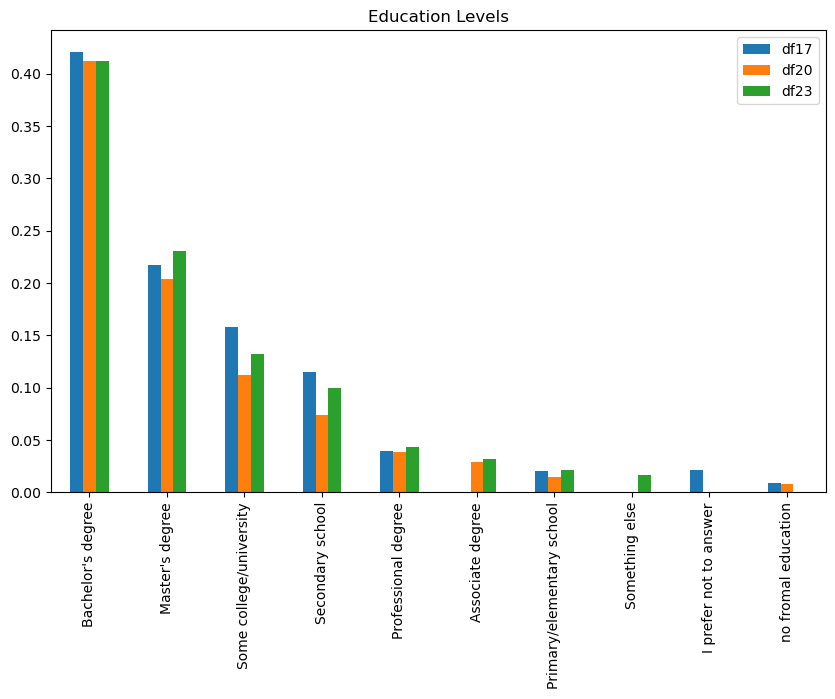

In [13]:
#Provide a pandas series of the counts for each dataframe
ed_vals_17 = df17['FormalEducation'].value_counts()/df17.shape[0]
ed_vals_20 = df20['EdLevel'].value_counts()/df20.shape[0]
ed_vals_23 = df23['EdLevel'].value_counts()/df23.shape[0]

# renaming the status in all 3 data frames
new_ed_names = {
                'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 'Master\'s degree', 
                'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 'Bachelor\'s degree', 
                'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 'Secondary school', 
                'Professional degree (JD, MD, etc.)': 'Professional degree', 
                'Professional degree (JD, MD, Ph.D, Ed.D, etc.)':'Professional degree', 
                'Some college/university study without earning a degree':'Some college/university',
                'Associate degree (A.A., A.S., etc.)':'Associate degree',
                'Other doctoral degree (Ph.D., Ed.D., etc.)':'Professional degree',
                'Some college/university study without earning a bachelor\'s degree':'Some college/university',
                'I never completed any formal education':'no fromal education',
                'Doctoral degree':'Professional degree'
                }
ed_vals_17,ed_vals_20,ed_vals_23 = rename_values(ed_vals_17,ed_vals_20,ed_vals_23, new_ed_names)
combined_ed = combine_data(ed_vals_17.groupby(ed_vals_17.index).sum(),ed_vals_20.groupby(ed_vals_20.index).sum(),ed_vals_23.groupby(ed_vals_23.index).sum())
combined_ed.plot(kind='bar', figsize=(10, 6))
plt.title('Education Levels');

# Salary

In [15]:
def add_commas_to_numbers(number):
    """
    Adds commas to a numeric value for better readability.
    :param number: The number to format.
    :return: The formatted string with commas.
    """
    try:
        formatted_number = "{:,.2f}".format(number)
        return formatted_number
    except ValueError:
        return "Invalid input"

# Example usage
amount = 1234567.89
formatted_amount = add_commas_to_numbers(amount)
print(f"Formatted amount with commas: {formatted_amount}")

Formatted amount with commas: 1,234,567.89


In [16]:
salary_min_2017 = df17.Salary.min()
salary_max_2017 = df17.Salary.max()
####
salary_min_2020 = df20.ConvertedComp.min()
salary_max_2020 = df20.ConvertedComp.max()
####
salary_min_2023 = df23.ConvertedCompYearly.min()
salary_max_2023 = df23.ConvertedCompYearly.max()


# Print the salary range
print("Salary Range for 2017 is: {} - {}".format(add_commas_to_numbers(salary_min_2017), add_commas_to_numbers(salary_max_2017)))
print("Salary Range for 2020 is: {} - {}".format(add_commas_to_numbers(salary_min_2020), add_commas_to_numbers(salary_max_2020)))
print("Salary Range for 2023 is: {} - {}".format(add_commas_to_numbers(salary_min_2023), add_commas_to_numbers(salary_max_2023)))

Salary Range for 2017 is: 0.00 - 197,000.00
Salary Range for 2020 is: 0.00 - 2,000,000.00
Salary Range for 2023 is: 1.00 - 74,351,432.00


The Salary range for 2020 and 2023 is much higher than 2017. Looks like there are some ourliers in the 2020 and 2023 datasets. There could be very few samples which will be removed from the comparison set.

In [17]:
df17_less_1m = np.round(df17[df17.Salary <= 100000]['Salary'].count()/df17.shape[0]* 100,2)
df17_more_1m = np.round(df17[df17.Salary > 100000]['Salary'].count()/df17.shape[0]* 100,2)
df17_null_salary = np.round(df17.Salary.isnull().sum()/df17.shape[0]* 100,2)
print("The 2017 Salary has {} rate of less than 1 million, {}% rate more than 1 million and {}% of missing salary input.". format(df17_less_1m,df17_more_1m,df17_null_salary))

df20_less_1m = np.round(df20[df20.ConvertedComp <= 100000]['ConvertedComp'].count()/df20.shape[0]* 100,2)
df20_more_1m = np.round(df20[df20.ConvertedComp > 100000]['ConvertedComp'].count()/df20.shape[0]* 100,2)
df20_null_salary = np.round(df20.ConvertedComp.isnull().sum()/df20.shape[0]* 100,2)
print("The 2020 Salary has {} rate of less than 1 million, {}% rate more than 1 million and {}% of missing salary input.". format(df20_less_1m,df20_more_1m,df20_null_salary))

df23_less_1m = np.round(df23[df23.ConvertedCompYearly <= 100000]['ConvertedCompYearly'].count()/df23.shape[0]* 100,2)
df23_more_1m = np.round(df23[df23.ConvertedCompYearly > 100000]['ConvertedCompYearly'].count()/df23.shape[0]* 100,2)
df23_null_salary = np.round(df23.ConvertedCompYearly.isnull().sum()/df23.shape[0]* 100,2)
print("The 2023 Salary has {} rate of less than 1 million, {}% rate more than 1 million and {}% of missing salary input.". format(df23_less_1m,df23_more_1m,df23_null_salary))

The 2017 Salary has 21.4 rate of less than 1 million, 3.69% rate more than 1 million and 74.92% of missing salary input.
The 2020 Salary has 41.65 rate of less than 1 million, 12.27% rate more than 1 million and 46.08% of missing salary input.
The 2023 Salary has 35.56 rate of less than 1 million, 18.29% rate more than 1 million and 46.16% of missing salary input.


The salary comparison between 2017, 2020 and 2023 makes it difficult to compare 2017 with 2020 and 2023 since there is more missing value for 2017 compare to the others. However 2020 and 2023 are more comparable. 
Comparing 2020 and 2023 we can see 6% increase in earnings of more than 1 million, and same decrease in the less than 1 million range. Now we look deeper into the less than 1 million range and see what type of the jobs are at the higher pay range.

# Part I: What new job opportunities have emerged in the developer community over the years?

### Developer Type

In [18]:
df17['DeveloperType'] = df17['DeveloperType'].dropna()
df17['WebDeveloperType'] = df17['WebDeveloperType'].astype(str)

def replacewebdevtype(row):
    if row['WebDeveloperType'] != 'nan':
        return row['DeveloperType'].replace('Web developer', row['WebDeveloperType'])
    else:
        return row['DeveloperType']
    
df17['DeveloperType'] = df17.apply(replacewebdevtype, axis=1)


In [19]:
dev_type17 = df17['DeveloperType'].dropna().str.split(";") # cleaning the space
dev_set17 = set([ item for elem in dev_type17 for item in elem])
dev_set17

{' Data scientist',
 ' Database administrator',
 ' Desktop applications developer',
 ' DevOps specialist',
 ' Developer with a statistics or mathematics background',
 ' Embedded applications/devices developer',
 ' Graphic designer',
 ' Graphics programming',
 ' Machine learning specialist',
 ' Mobile developer',
 ' Other',
 ' Quality assurance engineer',
 ' Systems administrator',
 'Back-end Web developer',
 'Data scientist',
 'Database administrator',
 'Desktop applications developer',
 'DevOps specialist',
 'Developer with a statistics or mathematics background',
 'Embedded applications/devices developer',
 'Front-end Web developer',
 'Full stack Web developer',
 'Graphic designer',
 'Graphics programming',
 'Machine learning specialist',
 'Mobile developer',
 'Other',
 'Quality assurance engineer',
 'Systems administrator',
 'Web developer'}

In [20]:
'''
It seems that some types are duplicated which is related to extra space int he value so 
we need to eliminate those cases
''' 
df17['DeveloperType'] = df17['DeveloperType'].str.replace(r'\s*;\s*', ';', regex=True)
df17['DeveloperType']

0                                                      NaN
1                                                      NaN
2                                                    Other
3                                                      NaN
4        Mobile developer;Graphics programming;Desktop ...
                               ...                        
51387    Web developer;Developer with a statistics or m...
51388                                                  NaN
51389                  Web developer;Systems administrator
51390                       Web developer;Mobile developer
51391                                                  NaN
Name: DeveloperType, Length: 51392, dtype: object

In [21]:
dev_type17 = df17['DeveloperType'].dropna().str.split(";") # cleaning the space
dev_set17 = set([ item for elem in dev_type17 for item in elem])
dev_set17

{'Back-end Web developer',
 'Data scientist',
 'Database administrator',
 'Desktop applications developer',
 'DevOps specialist',
 'Developer with a statistics or mathematics background',
 'Embedded applications/devices developer',
 'Front-end Web developer',
 'Full stack Web developer',
 'Graphic designer',
 'Graphics programming',
 'Machine learning specialist',
 'Mobile developer',
 'Other',
 'Quality assurance engineer',
 'Systems administrator',
 'Web developer'}

In [22]:
dev_type20 = df20.DevType.dropna().str.split(";")
dev_set20 = set([ item for elem in dev_type20 for item in elem])
dev_set20

{'Academic researcher',
 'Data or business analyst',
 'Data scientist or machine learning specialist',
 'Database administrator',
 'Designer',
 'DevOps specialist',
 'Developer, QA or test',
 'Developer, back-end',
 'Developer, desktop or enterprise applications',
 'Developer, embedded applications or devices',
 'Developer, front-end',
 'Developer, full-stack',
 'Developer, game or graphics',
 'Developer, mobile',
 'Educator',
 'Engineer, data',
 'Engineer, site reliability',
 'Engineering manager',
 'Marketing or sales professional',
 'Product manager',
 'Scientist',
 'Senior executive/VP',
 'System administrator'}

In [23]:
dev_type23 = df23.DevType.dropna().str.split(";")
dev_set23 = set([ item for elem in dev_type23 for item in elem])
dev_set23

{'Academic researcher',
 'Blockchain',
 'Cloud infrastructure engineer',
 'Data or business analyst',
 'Data scientist or machine learning specialist',
 'Database administrator',
 'Designer',
 'DevOps specialist',
 'Developer Advocate',
 'Developer Experience',
 'Developer, QA or test',
 'Developer, back-end',
 'Developer, desktop or enterprise applications',
 'Developer, embedded applications or devices',
 'Developer, front-end',
 'Developer, full-stack',
 'Developer, game or graphics',
 'Developer, mobile',
 'Educator',
 'Engineer, data',
 'Engineer, site reliability',
 'Engineering manager',
 'Hardware Engineer',
 'Marketing or sales professional',
 'Other (please specify):',
 'Product manager',
 'Project manager',
 'Research & Development role',
 'Scientist',
 'Security professional',
 'Senior Executive (C-Suite, VP, etc.)',
 'Student',
 'System administrator'}

In [24]:
def field_expander(df_column,sep):
     # Input validation
    if not isinstance(df_column, pd.Series):
        raise ValueError("df_column should be a pandas Series object.")
    if not isinstance(sep, str):
        raise ValueError("sep should be a string.")

    # Handle missing values
    df_column = df_column.dropna()

    # Count occurrences
    expand_df = df_column.str.get_dummies(sep)
    return expand_df
    

In [25]:
def field_count(df_column, sep):
         # Input validation
    if not isinstance(df_column, pd.Series):
        raise ValueError("df_column should be a pandas Series object.")
    if not isinstance(sep, str):
        raise ValueError("sep should be a string.")
    
    # Handle missing values
    df = df_column.dropna()

    # Expand the values
    expand_df = df.str.get_dummies(sep)
    
    # Count occurrences
    count = expand_df.melt(ignore_index=False).groupby('variable')['value'].sum()

    # Sort the result
    count = count.sort_values(ascending=False)

    return count

In [26]:
def field_percentage(df_column, sep):
    # Input validation
    if not isinstance(df_column, pd.Series):
        raise ValueError("df_column should be a pandas Series object.")
    if not isinstance(sep, str):
        raise ValueError("sep should be a string.")

    # Handle missing values
    df_column = df_column.dropna()

    # Count occurrences
    expand_df = df_column.str.get_dummies(sep)

    # Calculate percentage
    total_rows = df_column.shape[0]
    percentages = expand_df.sum() / total_rows * 100

    # Sort the result
    percentages = percentages.sort_values(ascending=False)

    return percentages

In [27]:
def calculate_category_percentage(df,column_names):
    # Group the data by categories
    grouped_data = df.groupby(column_names)
    # Get the count of users in each group
    count_per_group = grouped_data.size()/df.shape[0]*100
    return count_per_group

In [28]:
dev_series17 = field_count(df17['DeveloperType'],';')
dev_series20 = field_count(df20['DevType'],';')
dev_series23 = field_count(df23['DevType'],';')

In [29]:
# renaming the devtype names in all 3 data frames
new_dev_types = {'Embedded applications/devices developer': 'Developer, embedded applications or devices', 
                 'Graphic designer': 'Developer, game or graphics', 
                 'Graphics programming': 'Developer, game or graphics', 
                 'Data scientist': 'Data scientist or machine learning specialist',
                 'Machine learning specialist': 'Data scientist or machine learning specialist',
                 'Mobile developer':'Developer, mobile',
                 'Quality assurance engineer':'Developer, QA or test',
                 'Senior Executive (C-Suite, VP, etc.)':'Senior executive/VP',
                 'Desktop applications developer':'Developer, desktop or enterprise applications',
                 'Other (please specify):':'Other',
                 'Back-end Web developer': 'Developer, back-end',
                 'Front-end Web developer':'Developer, front-end',
                 'Full stack Web developer':'Developer, full-stack',
                 'Systems administrator':'System administrator'
                   }

In [30]:
dev_series17,dev_series20,dev_series23 = rename_values(dev_series17,dev_series20,dev_series23,new_dev_types)
## We need to consolidate indexes after renaming to avoid any duplication
dev_series17 =dev_series17.groupby(dev_series17.index).sum()

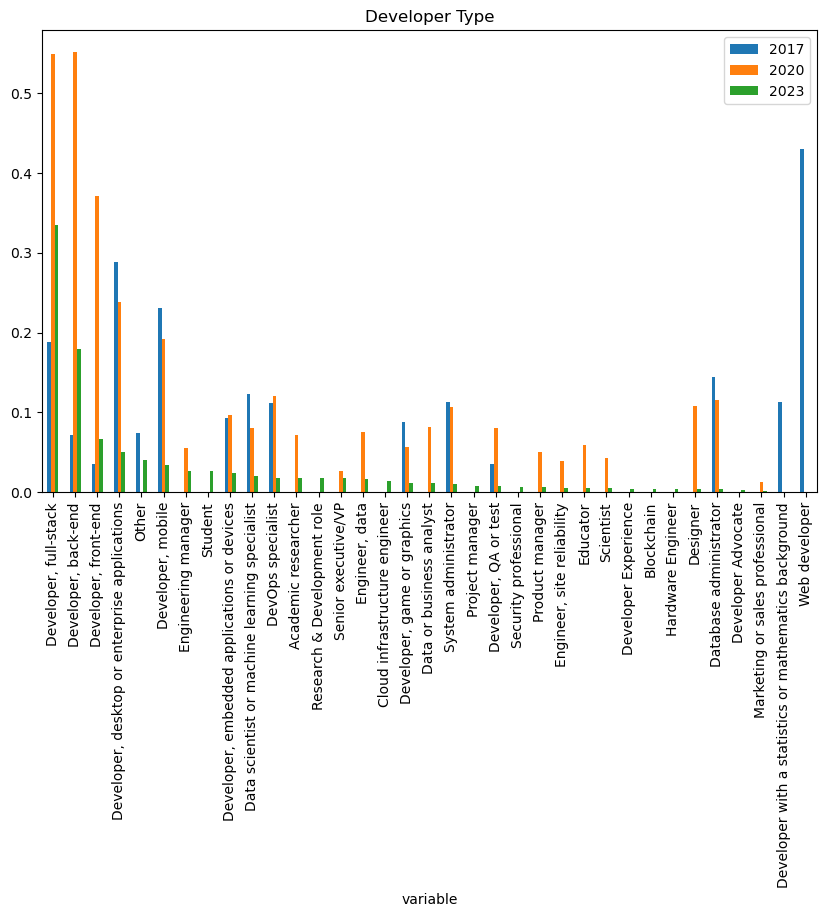

In [31]:
combined_devtype = combine_data(dev_series17/df17.DeveloperType.count(),dev_series20/df20.DevType.count(),dev_series23/df23.DevType.count())

#combined_devtype = combine_data(dev_series17,dev_series20,dev_series23)
combined_devtype.plot(kind='bar', figsize=(10, 6))
plt.legend(['2017', '2020', '2023'])
plt.title('Developer Type');

The comparison of data from 2017 to 2023 reveals that the developers' list of activities has expanded with the addition of 18 more job functions. This increase can be attributed to both the inclusion of additional details in the survey and the growing diversity of job roles within the developer community.
Another intriguing observation is the decline in the number of data scientists or machine learning specialists between 2017 and 2023. This raises questions about the factors contributing to this drop. Unfortunately this data does not have reliable data to dig deeper into this issue.

## Part II: How has the education level requirement changed in the field of Data Science and Machine Learning?

To address this question, I devide the data into two groups: 'Data Scientist and Machine Learning Specialists' and 'Other Developer Types'. The follwoing blocks I will look into the data and compare the education level of data sceintists with other developers to see if education level have any effect in getting into this field

In [32]:
def split_data(df, column_name, split_by):
    """
    Split a DataFrame based on a specific column and a value to include or exclude.

    Parameters:
    df (pandas.DataFrame): The DataFrame to be filtered.
    column_name (str): The name of the column to filter on.
    filter_by (str): The value to include or exclude in the filtering.

    Returns:
    tuple: A tuple containing two DataFrames - the first DataFrame includes rows that match the filter,
           and the second DataFrame includes rows that do not match the filter.
    """
    df_inc = df[df[column_name].str.contains(split_by, case=False, na=False)]
    df_exc = df[~df[column_name].str.contains(split_by, case=False, na=False)]
    return df_inc, df_exc

In [33]:
ds_df17, nds_df17 = split_data(df17,'DeveloperType','Data scientist')
ds_df20, nds_df20 = split_data(df20,'DevType','Data scientist')
ds_df23, nds_df23 = split_data(df23,'DevType','Data scientist')

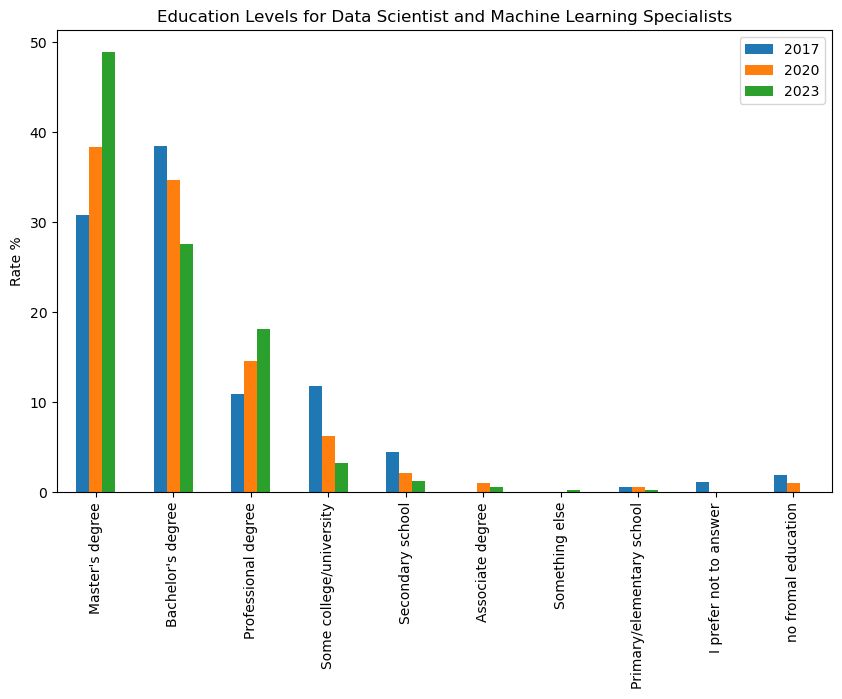

In [34]:
#Provide a pandas series of the counts for each dataframe
ed_vals_ds17 = ds_df17['FormalEducation'].value_counts()/ds_df17.shape[0]
ed_vals_ds20 = ds_df20['EdLevel'].value_counts()/ds_df20.shape[0]
ed_vals_ds23 = ds_df23['EdLevel'].value_counts()/ds_df23.shape[0]

# renaming the status in all 3 data frames
new_ed_names = {
                'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 'Master\'s degree', 
                'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 'Bachelor\'s degree', 
                'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 'Secondary school', 
                'Professional degree (JD, MD, etc.)': 'Professional degree', 
                'Professional degree (JD, MD, Ph.D, Ed.D, etc.)':'Professional degree', 
                'Some college/university study without earning a degree':'Some college/university',
                'Associate degree (A.A., A.S., etc.)':'Associate degree',
                'Other doctoral degree (Ph.D., Ed.D., etc.)':'Professional degree',
                'Some college/university study without earning a bachelor\'s degree':'Some college/university',
                'I never completed any formal education':'no fromal education',
                'Doctoral degree':'Professional degree'
                }
ed_vals_ds17,ed_vals_ds20,ed_vals_ds23 = rename_values(ed_vals_ds17,ed_vals_ds20,ed_vals_ds23, new_ed_names)
combined_ed = combine_data(ed_vals_ds17.groupby(ed_vals_ds17.index).sum(),ed_vals_ds20.groupby(ed_vals_ds20.index).sum(),ed_vals_ds23.groupby(ed_vals_ds23.index).sum())*100
combined_ed.plot(kind='bar', figsize=(10, 6))
plt.legend(['2017','2020','2023'])
plt.ylabel('Rate %')
plt.title('Education Levels for Data Scientist and Machine Learning Specialists');

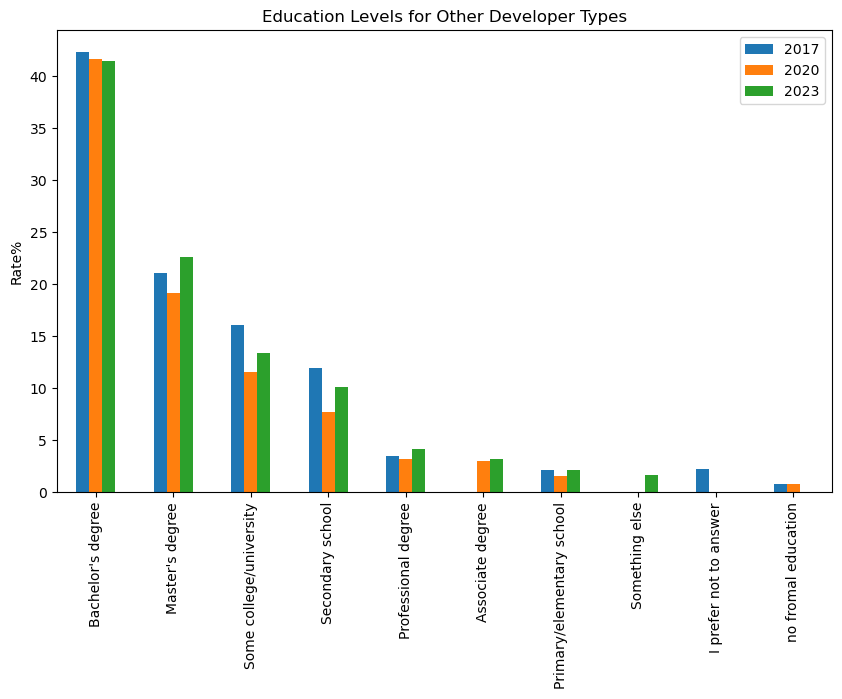

In [35]:
#Provide a pandas series of the counts for each dataframe
ed_vals_nds17 = nds_df17['FormalEducation'].value_counts()/nds_df17.shape[0]
ed_vals_nds20 = nds_df20['EdLevel'].value_counts()/nds_df20.shape[0]
ed_vals_nds23 = nds_df23['EdLevel'].value_counts()/nds_df23.shape[0]

# renaming the status in all 3 data frames
new_ed_names = {
                'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 'Master\'s degree', 
                'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 'Bachelor\'s degree', 
                'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 'Secondary school', 
                'Professional degree (JD, MD, etc.)': 'Professional degree', 
                'Professional degree (JD, MD, Ph.D, Ed.D, etc.)':'Professional degree', 
                'Some college/university study without earning a degree':'Some college/university',
                'Associate degree (A.A., A.S., etc.)':'Associate degree',
                'Other doctoral degree (Ph.D., Ed.D., etc.)':'Professional degree',
                'Some college/university study without earning a bachelor\'s degree':'Some college/university',
                'I never completed any formal education':'no fromal education',
                'Doctoral degree':'Professional degree'
                }
ed_vals_nds17,ed_vals_nds20,ed_vals_nds23 = rename_values(ed_vals_nds17,ed_vals_nds20,ed_vals_nds23, new_ed_names)
combined_ed = combine_data(ed_vals_nds17.groupby(ed_vals_nds17.index).sum(),ed_vals_nds20.groupby(ed_vals_nds20.index).sum(),ed_vals_nds23.groupby(ed_vals_nds23.index).sum())*100
combined_ed.plot(kind='bar', figsize=(10, 6))
plt.legend(['2017','2020','2023'])
plt.ylabel('Rate%')
plt.title('Education Levels for Other Developer Types');

Comparison of the charts in 2017, 2020, and 2023 shows that those who are in the field of data science and machine learning have higher count of Master's and Professional degrees, compare to the other group.

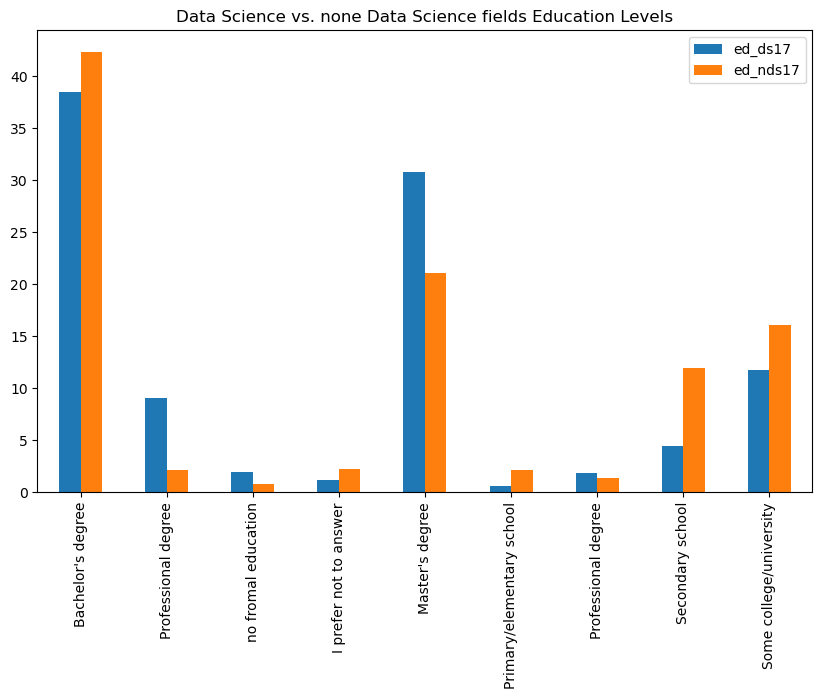

In [36]:
ds_education_series17 = pd.Series(field_percentage(ds_df17['FormalEducation'],';'),name = 'ed_ds17')
nds_education_series17 = pd.Series(field_percentage(nds_df17['FormalEducation'],';'),name = 'ed_nds17')
combined_ed_df = pd.concat([ds_education_series17,nds_education_series17],axis= 1,sort= True)
combined_ed_df.columns = [ds_education_series17.name,nds_education_series17.name]
combined_ed_df.rename(index = new_ed_names,inplace = True)
combined_ed_df.plot(kind='bar', figsize=(10, 6))
plt.title('Data Science vs. none Data Science fields Education Levels');

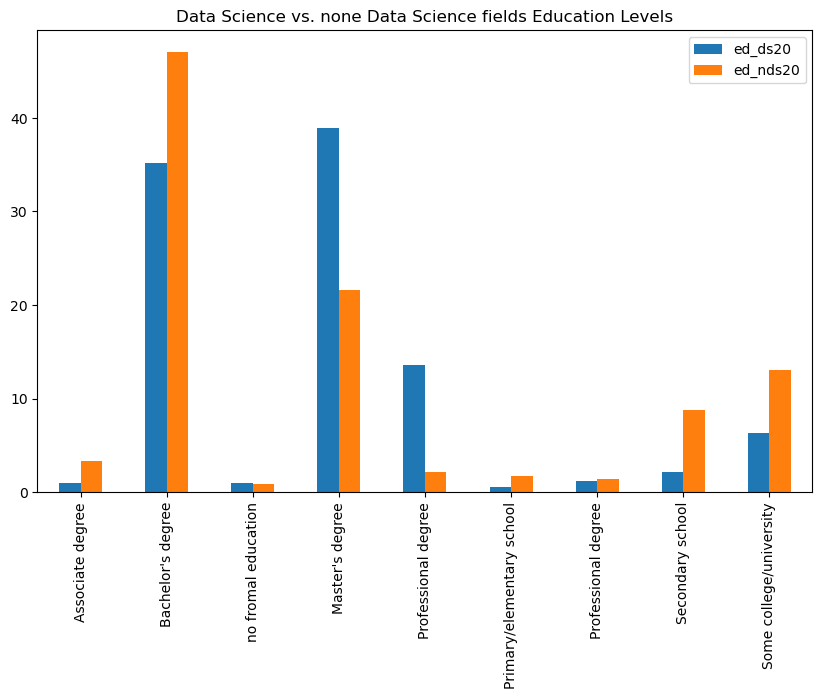

In [37]:
ds_education_series20 = pd.Series(field_percentage(ds_df20['EdLevel'],';'),name = 'ed_ds20')
nds_education_series20 = pd.Series(field_percentage(nds_df20['EdLevel'],';'),name = 'ed_nds20')
combined_ed_df = pd.concat([ds_education_series20,nds_education_series20],axis= 1,sort= True)
combined_ed_df.columns = [ds_education_series20.name,nds_education_series20.name]
combined_ed_df.rename(index = new_ed_names,inplace = True)
combined_ed_df.plot(kind='bar', figsize=(10, 6))
plt.title('Data Science vs. none Data Science fields Education Levels');

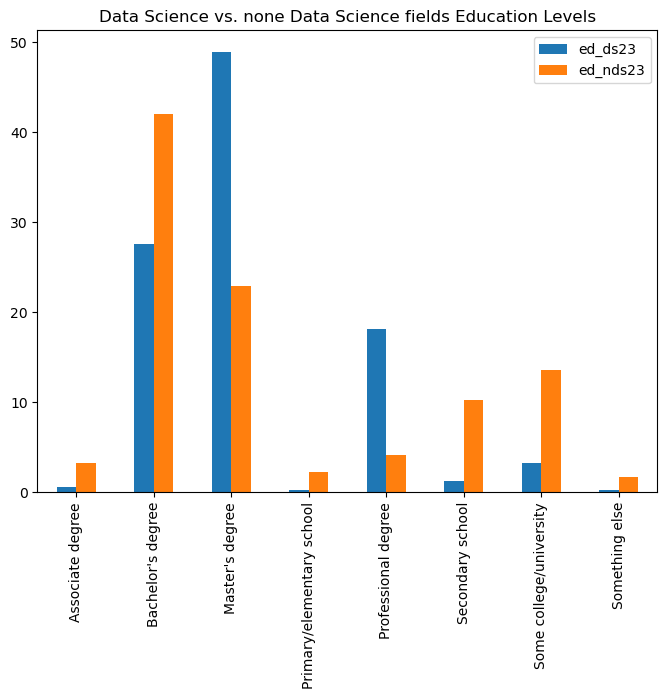

In [38]:
ds_education_series23 = pd.Series(field_percentage(ds_df23['EdLevel'],';'),name = 'ed_ds23')
nds_education_series23 = pd.Series(field_percentage(nds_df23['EdLevel'],';'),name = 'ed_nds23')
combined_ed_df = pd.concat([ds_education_series23,nds_education_series23],axis= 1,sort= True)
combined_ed_df.columns = [ds_education_series23.name,nds_education_series23.name]
combined_ed_df.rename(index = new_ed_names,inplace = True)
combined_ed_df.plot(kind='bar', figsize=(8,6))
plt.title('Data Science vs. none Data Science fields Education Levels');

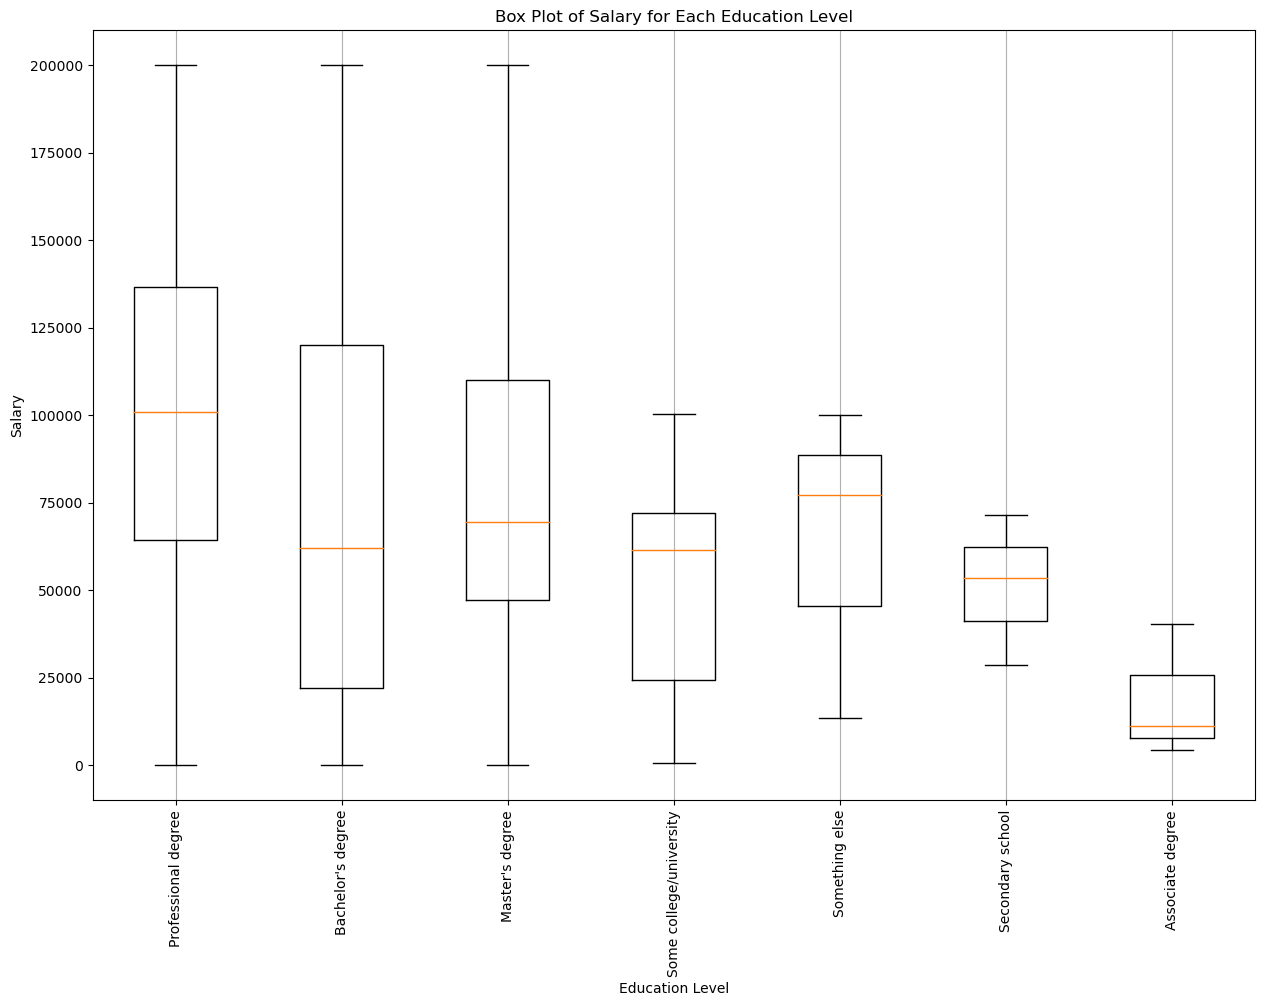

In [39]:
# How does education realate to Salary
ds_df23_COPY = ds_df23.copy()
ds_df23_COPY = ds_df23_COPY.dropna(subset=['ConvertedCompYearly'])
# Drop rows with null values in the 'salary' column or values greater than 200
ds_df23_COPY = ds_df23_COPY.drop(ds_df23_COPY[(ds_df23_COPY['ConvertedCompYearly'].isnull()) | (ds_df23_COPY['ConvertedCompYearly'] > 200000)].index)

# renaming the status in all data frames
education_mapping  = {
                'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 'Master\'s degree', 
                'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 'Bachelor\'s degree', 
                'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 'Secondary school', 
                'Professional degree (JD, MD, Ph.D, Ed.D, etc.)':'Professional degree', 
                'Some college/university study without earning a degree':'Some college/university',
                'Associate degree (A.A., A.S., etc.)':'Associate degree'
                }
ds_df23_COPY['EdLevel'] = ds_df23_COPY['EdLevel'].replace(new_ed_names)
# Set the figure size
plt.figure(figsize=(15, 10))

# Create a list of salary values for each education type
salary_data = [ds_df23_COPY[ds_df23_COPY['EdLevel'] == level]['ConvertedCompYearly'] for level in ds_df23_COPY['EdLevel'].unique()]

# Plot the box plot
plt.boxplot(salary_data, labels=ds_df23_COPY['EdLevel'].unique())

# Adding labels and title to the plot
plt.xlabel('Education Level',)
plt.ylabel('Salary')
plt.title('Box Plot of Salary for Each Education Level')
plt.xticks(rotation=90)
# Displaying the plot

# Adding gridlines
plt.grid(True, axis='x')

'''# Enhancing the visual appearance of the plot
colors = ['lightblue', 'lightgreen', 'lightyellow', 'lightpink']
for patch, color in zip(plt['boxes'], colors):
    patch.set_facecolor(color)'''

# Displaying the plot
plt.show()

plt.show()

Following section looks into the Industry in which the developers are active and their company field of servies.

In [40]:
##What industry is the company you work for in?
field_percentage(ds_df23['Industry'],';')

Information Services, IT, Software Development, or other Technology    40.000000
Other                                                                  13.026316
Financial Services                                                     12.631579
Manufacturing, Transportation, or Supply Chain                         10.000000
Healthcare                                                              8.947368
Retail and Consumer Services                                            5.789474
Advertising Services                                                    2.631579
Insurance                                                               2.236842
Higher Education                                                        2.105263
Oil & Gas                                                               1.447368
Legal Services                                                          0.789474
Wholesale                                                               0.394737
dtype: float64

In [41]:
# My company has:
field_percentage(ds_df23['ProfessionalTech'],';')

Continuous integration (CI) and (more often) continuous delivery    61.143524
DevOps function                                                     55.775963
Automated testing                                                   45.040840
Microservices                                                       41.306884
Developer portal or other central places to find tools/services     29.988331
AI-assisted technology tool(s)                                      27.771295
Observability tools                                                 27.537923
None of these                                                       15.752625
Innersource initiative                                              13.768961
dtype: float64

# Artificial Intelligence (AI)

## Which parts of your development workflow are you currently using AI tools for and which are you interested in using AI tools for over the next year? Please select all that apply.


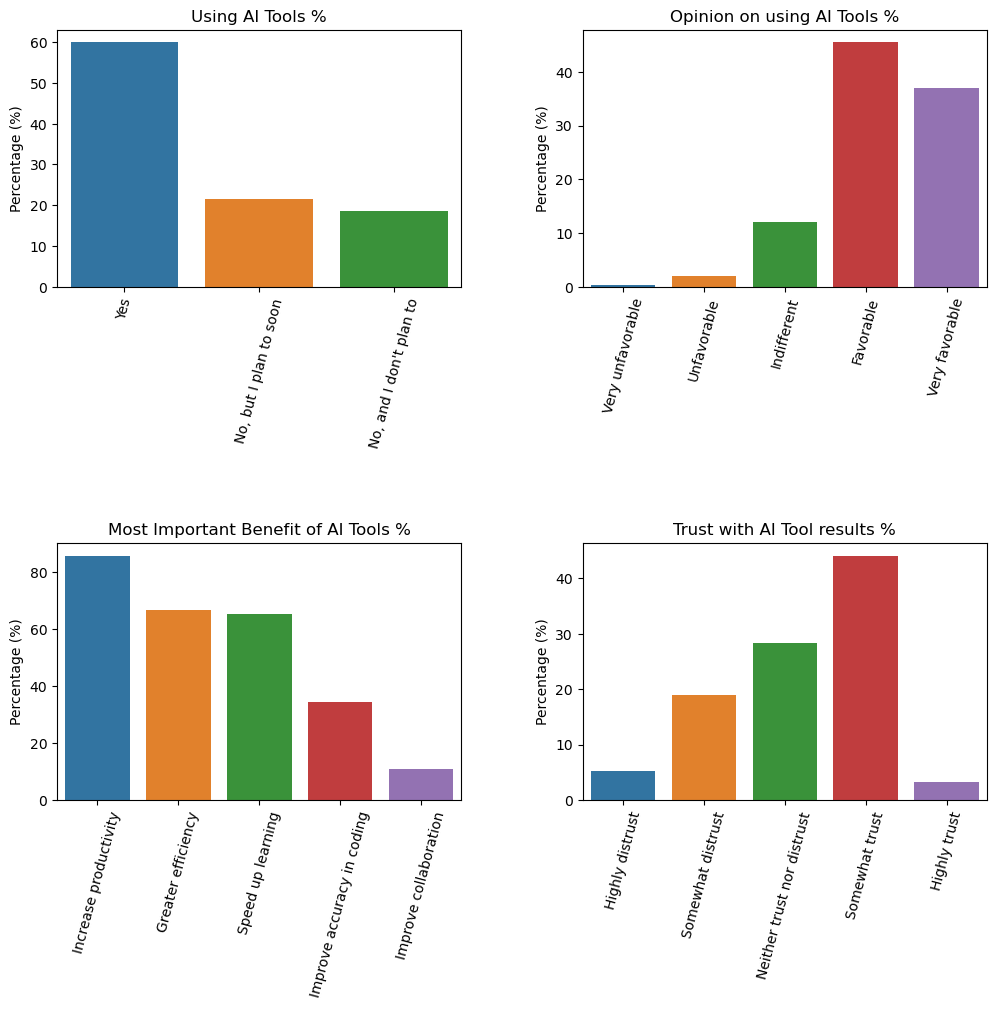

In [42]:

# Assuming you have a DataFrame 'ds_df23' with relevant data
columns = ['AISelect', 'AISent', 'AIAcc', 'AIBen']
labels = ['Using AI Tools %', 'Opinion on using AI Tools %', 'Most Important Benefit of AI Tools %', 'Trust with AI Tool results %']

# Set a custom color palette (you can choose from other Seaborn palettes)
custom_palette = sns.color_palette("husl", len(columns))

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
# Plot each bar chart with the custom palette
for i, col in enumerate(columns):
    # Reindex the 'AISent' series based on the new order
    if col == 'AISent':
        new_order = ['Very unfavorable','Unfavorable','Indifferent','Favorable','Very favorable']
        S = field_percentage(ds_df23[col], ';')
        S = S.reindex(new_order)
    elif col == 'AIAcc':
        S = field_percentage(ds_df23[col], ';')
        S = S.drop('Other (please explain)')
    elif col == 'AIBen':
        new_order = ['Highly distrust','Somewhat distrust','Neither trust nor distrust','Somewhat trust','Somewhat distrust','Highly trust']
        S = field_percentage(ds_df23[col], ';')
        S = S.reindex(new_order)
    else:
        S = field_percentage(ds_df23[col], ';')
        
    x = S.index
    y = S.values
    ax = axs[i // 2, i % 2]
    sns.barplot(x=x, y=y,  ax=ax)
    ax.set_title(labels[i])
    ax.set_ylabel('Percentage (%)')
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=75)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=1, wspace=0.3)

# Show the plot
plt.show()

In [43]:
# Do you currently use AI tools in your development process?
field_percentage(ds_df23['AISelect'],';')

Yes                        60.012594
No, but I plan to soon     21.410579
No, and I don't plan to    18.576826
dtype: float64

In [44]:
# How favorable is your stance on using AI tools as part of your development workflow?
field_percentage(ds_df23['AISent'],';')

Favorable           45.546088
Very favorable      36.948102
Indifferent         12.006197
Unsure               3.175833
Unfavorable          2.013943
Very unfavorable     0.309837
dtype: float64

In [45]:
# For the AI tools you use as part of your development workflow, what are the MOST important benefits you are hoping to achieve? 
field_percentage(ds_df23['AIAcc'],';')

Increase productivity         85.835095
Greater efficiency            66.701903
Speed up learning             65.327696
Improve accuracy in coding    34.460888
Improve collaboration         10.782241
Other (please explain)         6.342495
dtype: float64

In [46]:
## How much do you tust the accuract of the output from AI tools as part of your development workflow?
field_percentage(ds_df23['AIBen'],';')

Somewhat trust                44.117647
Neither trust nor distrust    28.405573
Somewhat distrust             18.962848
Highly distrust                5.263158
Highly trust                   3.250774
dtype: float64

In [47]:
field_percentage(ds_df23['ToolsTechHaveWorkedWith'],';').head()

Pip         69.682908
Docker      63.186388
Homebrew    24.207270
npm         23.588554
Make        22.737819
dtype: float64

In [48]:
field_percentage(ds_df23['AISearchHaveWorkedWith'],';')

ChatGPT           93.135593
Bing AI           23.474576
WolframAlpha      20.932203
Google Bard AI    14.406780
You.com            4.152542
Perplexity AI      3.305085
Phind              2.881356
Quora Poe          1.779661
Andi               0.508475
Metaphor           0.508475
Neeva AI           0.423729
dtype: float64

In [49]:
field_percentage(ds_df23['AISearchWantToWorkWith'],';')

ChatGPT           89.735772
Google Bard AI    32.520325
Bing AI           26.626016
WolframAlpha      23.373984
Perplexity AI      4.471545
You.com            4.471545
Phind              4.065041
Quora Poe          2.439024
Metaphor           1.422764
Andi               0.813008
Neeva AI           0.711382
dtype: float64

In [50]:
field_percentage(ds_df23['AIDevHaveWorkedWith'],';')

GitHub Copilot        87.848606
Tabnine               17.729084
AWS CodeWhisperer      7.171315
Whispr AI              2.988048
Synk Code              1.992032
Codeium                1.593625
Rubber Duck.AI         1.593625
Adrenaline             1.195219
Mintlify               1.195219
Replit Ghostwriter     1.195219
dtype: float64

In [51]:
field_percentage(ds_df23['AIDevWantToWorkWith'],';')

GitHub Copilot        91.644205
AWS CodeWhisperer     17.250674
Tabnine                6.469003
Whispr AI              5.390836
Rubber Duck.AI         3.504043
Replit Ghostwriter     2.156334
Codeium                1.617251
Mintlify               1.078167
Synk Code              1.078167
Adrenaline             0.808625
dtype: float64

## Which parts of your development workflow are you currently using AI tools for and which are you interested in using AI tools for over the next year?

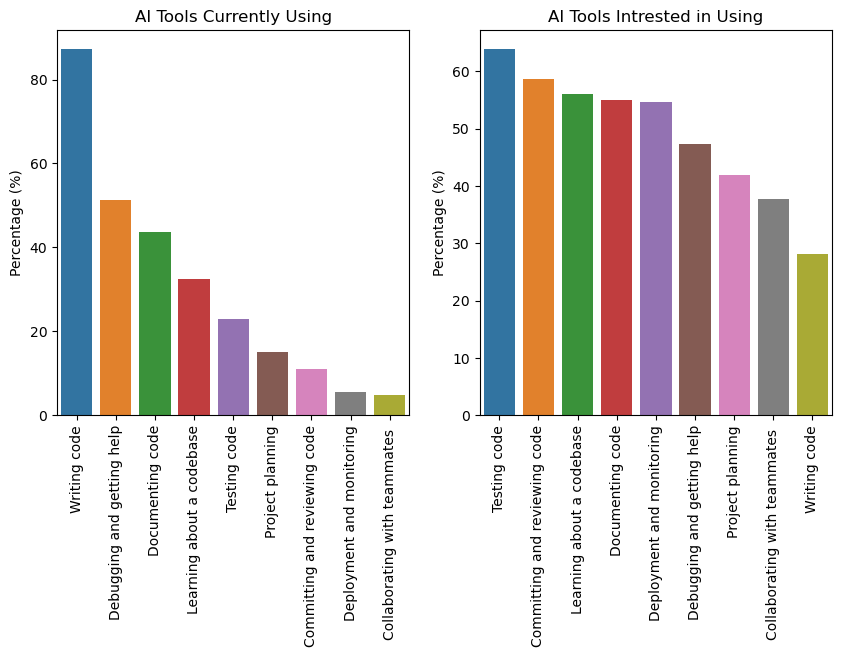

In [52]:

# Assuming you have a DataFrame 'ds_df23' with relevant data
columns = ['AIToolCurrently Using', 'AIToolInterested in Using']
labels = ['AI Tools Currently Using', 'AI Tools Intrested in Using']

# Set a custom color palette (you can choose from other Seaborn palettes)
custom_palette = sns.color_palette("husl", len(columns))

# Create a 1x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# Plot each bar chart with the custom palette
for i, col in enumerate(columns):
    S = field_percentage(ds_df23[col], ';')
    S = S.drop('Other (please describe)')
    x = S.index
    y = S.values
    ax = axs[i]
    sns.barplot(x=x, y=y,  ax=ax)
    ax.set_title(labels[i])
    ax.set_ylabel('Percentage (%)')
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


In [53]:
field_percentage(ds_df23['AIToolCurrently Using'],';')

Writing code                     87.369641
Debugging and getting help       51.332561
Documenting code                 43.684820
Learning about a codebase        32.560834
Testing code                     22.943221
Project planning                 15.179606
Committing and reviewing code    11.123986
Deployment and monitoring         5.446118
Collaborating with teammates      4.866744
Other (please describe)           1.390498
dtype: float64

In [54]:
field_percentage(ds_df23['AIToolInterested in Using'],';')

Testing code                     63.980464
Committing and reviewing code    58.730159
Learning about a codebase        56.043956
Documenting code                 54.945055
Deployment and monitoring        54.700855
Debugging and getting help       47.252747
Project planning                 42.002442
Collaborating with teammates     37.728938
Writing code                     28.205128
Other (please describe)           0.732601
dtype: float64

In [55]:
field_percentage(ds_df23['AIToolNot interested in Using'],';')

Collaborating with teammates     70.693069
Project planning                 55.247525
Deployment and monitoring        49.306931
Committing and reviewing code    38.415842
Learning about a codebase        23.762376
Testing code                     20.000000
Documenting code                 10.297030
Debugging and getting help        9.900990
Writing code                      7.722772
Other (please describe)           2.178218
dtype: float64

## Thinking about how your workflow and process changes over time, how similar or different do you anticipate your workflow to be 1 year from now as a result of AI tools you are currently using?

In [56]:
S1 = field_percentage(ds_df23['AINextVery different'],';')
S2 = field_percentage(ds_df23['AINextSomewhat different'],';')
S3 = field_percentage(ds_df23['AINextNeither different nor similar'],';')
S4 = field_percentage(ds_df23['AINextSomewhat similar'],';')
S5 = field_percentage(ds_df23['AINextVery similar'],';')
combined_df = pd.concat([S1,S2,S3,S4,S5],axis= 1)
combined_df.columns = ['Very different','Somewhat different','Neither different nor similar','Somewhat similar', 'Very similar']
combined_df

,Very different,Somewhat different,Neither different nor similar,Somewhat similar,Very similar
Writing code,54.385965,68.148148,46.540881,62.416107,57.894737
Debugging and getting help,43.567251,38.148148,22.641509,18.120805,24.561404
Documenting code,42.690058,25.185185,18.238994,26.174497,17.543860
Learning about a codebase,23.684211,25.555556,14.465409,22.818792,15.789474
Testing code,23.099415,14.259259,13.207547,6.711409,8.771930
Project planning,9.649123,11.666667,9.433962,12.080537,8.771930
Committing and reviewing code,8.479532,5.370370,12.578616,6.040268,5.263158
Deployment and monitoring,4.678363,2.407407,5.031447,2.684564,5.263158
Collaborating with teammates,3.508772,2.222222,6.289308,4.026846,5.263158
Other (please describe),0.292398,0.370370,0.628931,NaN,3.508772


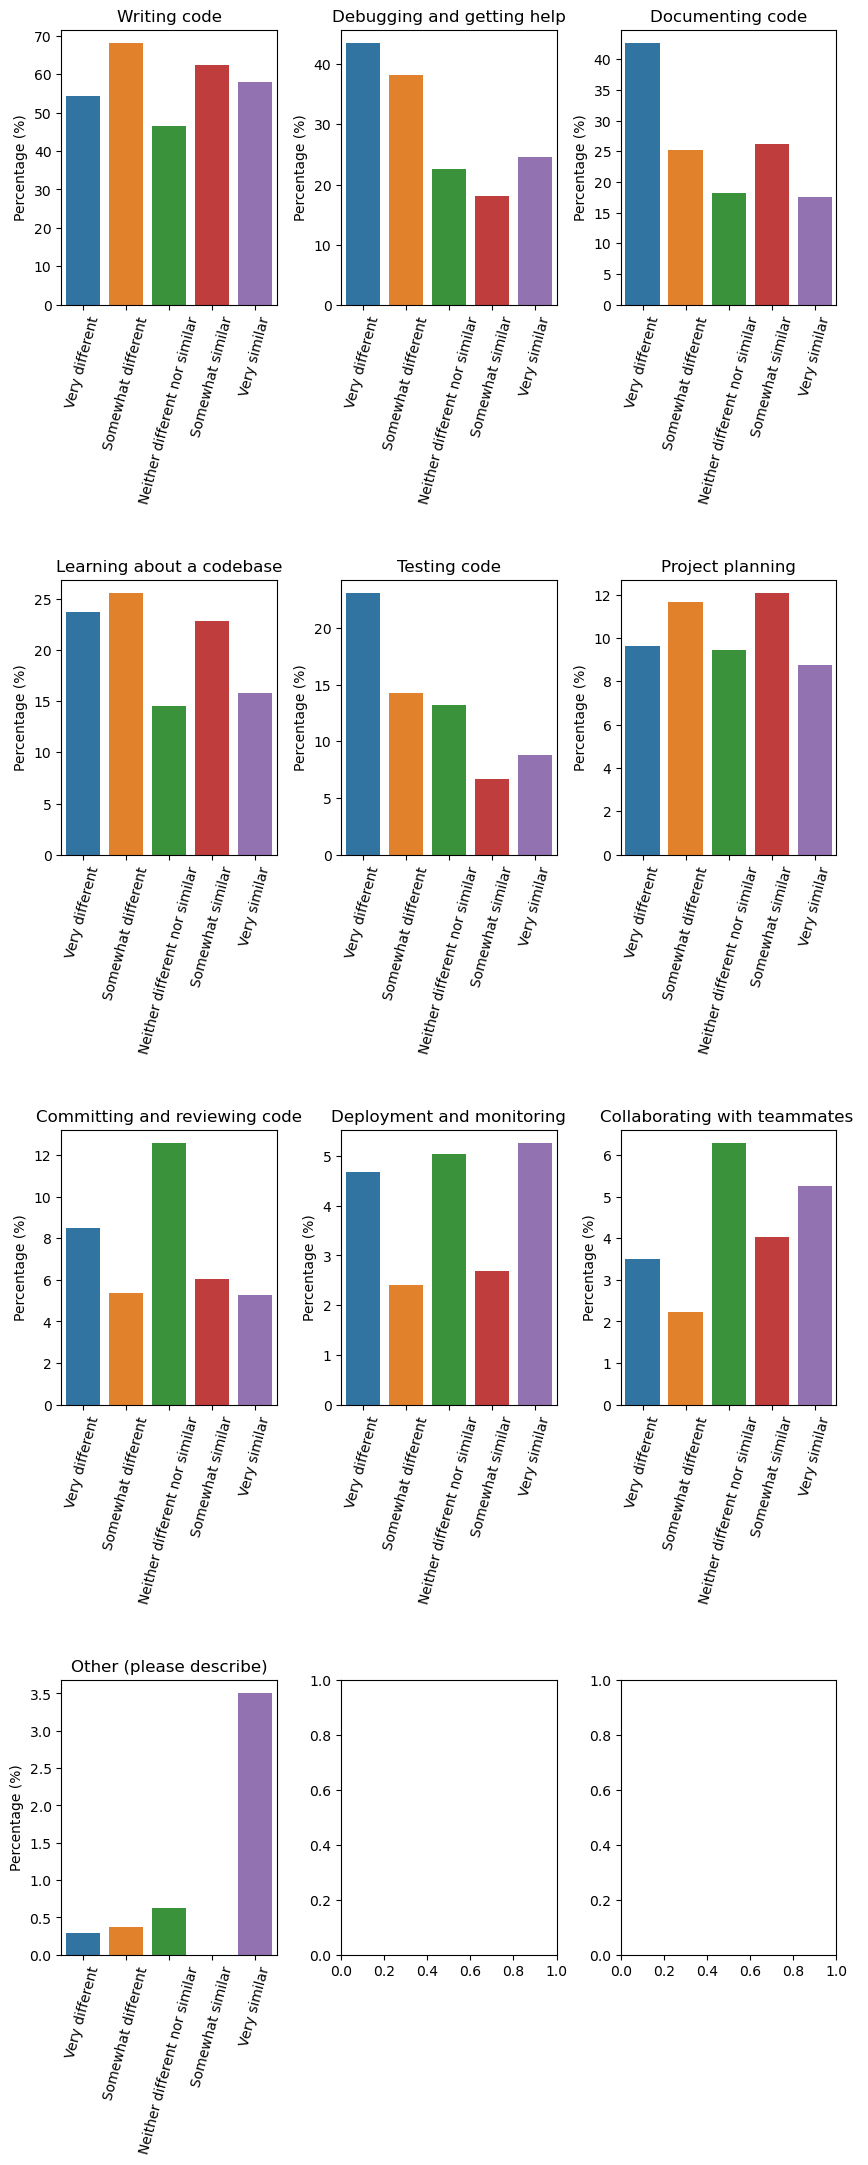

In [57]:
#%matplotlib notebook
%matplotlib inline
# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 25))

# Plot each column
for i, idx in enumerate(combined_df.index):
    ax = axes[i // 3, i % 3]
    x = combined_df.loc[idx].index
    y = combined_df.loc[idx].values
    sns.barplot(x=x, y=y,  ax=ax)
    ax.set_title(idx)
    ax.set_ylabel('Percentage (%)')
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 75)
# Adjust spacing between subplots
plt.subplots_adjust(hspace=1, wspace=0.3)
plt.show()

In [58]:
combined_df = combined_df.drop(index = ['Other (please describe)'])


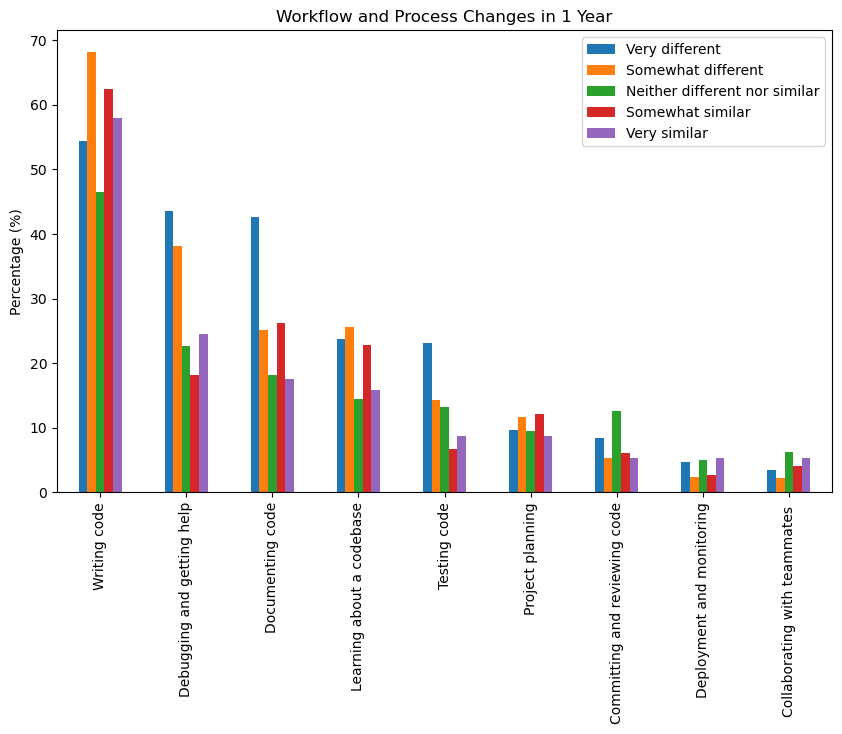

In [59]:
combined_df.plot(kind='bar',figsize=(10,6))
plt.ylabel('Percentage (%)')
plt.title('Workflow and Process Changes in 1 Year');


## Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year?

In [60]:
field_percentage(ds_df17['HaveWorkedLanguage'],';').head(10)

 SQL           60.752212
 JavaScript    49.734513
 Python        47.035398
 Java          30.398230
 PHP           26.946903
C#             18.451327
C              17.876106
 C++           17.566372
 R             16.725664
 C#            15.398230
dtype: float64

In [61]:
field_percentage(ds_df20['LanguageWorkedWith'],';').head(10)

Python                   83.484768
SQL                      62.292892
JavaScript               51.443079
HTML/CSS                 51.416355
Bash/Shell/PowerShell    42.169963
Java                     37.359701
C++                      31.747728
R                        29.449492
C                        26.696954
C#                       22.741849
dtype: float64

In [62]:
field_percentage(ds_df23['LanguageHaveWorkedWith'],';').head(10)

Python                     94.054396
SQL                        55.660974
Bash/Shell (all shells)    35.800127
JavaScript                 31.499051
R                          28.652751
HTML/CSS                   28.146743
C++                        20.113852
Java                       16.698292
C                          14.800759
TypeScript                 12.586970
dtype: float64

The data shows that Python and SQL are still the top programming languages in Data Science.